<b>¡Hola Christian!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test  = pd.read_csv('/datasets/gold_recovery_test.csv')
df_recov = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has hecho un excelente uso del método `info()` para obtener una visión general de tu dataset de entrenamiento. Esto es crucial para identificar valores nulos y comprender los tipos de datos presentes, lo que es fundamental para el análisis posterior.
</div>


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [5]:
df_recov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


<div class="alert alert-block alert-warning">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Has realizado un buen trabajo al cargar y explorar los datasets. Considera incluir una verificación de duplicados en tus datos para asegurar que no haya registros repetidos que puedan afectar el análisis posterior. Puedes utilizar el método `df.duplicated().sum()` para verificar la cantidad de duplicados.
</div>


In [6]:
def calc_recovery(C, F, T):
    return (C * (F - T)) / (F * (C - T)) * 100

In [7]:
metals = ['au', 'ag', 'pb']
stages = ['input.feed_', 'output.concentrate_', 'output.tail_']

print("\nCONCENTRACIÓN PROMEDIO DE METALES POR ETAPA")
for metal in metals:
    print(f"\n{metal.upper()}:")
    for stage in stages:
        col = f'rougher.{stage}{metal}'
        if col in df_train.columns:
            avg = df_train[col].mean()
            print(f"  {col}: {avg:.4f}")


CONCENTRACIÓN PROMEDIO DE METALES POR ETAPA

AU:
  rougher.input.feed_au: 7.1707
  rougher.output.concentrate_au: 17.4015
  rougher.output.tail_au: 1.7639

AG:
  rougher.input.feed_ag: 7.8323
  rougher.output.concentrate_ag: 10.5805
  rougher.output.tail_ag: 5.5666

PB:
  rougher.input.feed_pb: 3.2189
  rougher.output.concentrate_pb: 6.8803
  rougher.output.tail_pb: 0.5965


<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
Has calculado y mostrado correctamente la concentración promedio de metales en diferentes etapas del proceso. Esto proporciona una comprensión clara de cómo cambian las concentraciones a lo largo del proceso de recuperación, lo cual es esencial para el análisis del flujo del proceso.
</div>


In [8]:
diff = (rougher_calc - df_train['rougher.output.recovery']).abs()
print("EAM (Error Absoluto Medio):", diff.mean())
print("EAM (mediana):", diff.median())
print("Proporción de nulos en cálculo:", rougher_calc.isna().mean())

NameError: name 'rougher_calc' is not defined

KS statistic: 0.1923, p-value: 0.0000


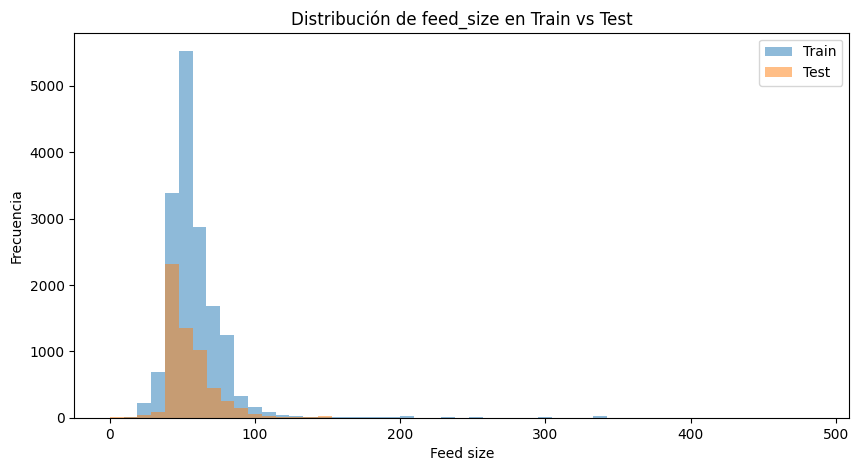

In [9]:
train_size = df_train["rougher.input.feed_size"].dropna()
test_size  = df_test["rougher.input.feed_size"].dropna()

ks_stat, p_value = ks_2samp(train_size, test_size)
print(f"KS statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

plt.figure(figsize=(10,5))
plt.hist(train_size, bins=50, alpha=0.5, label="Train")
plt.hist(test_size, bins=50, alpha=0.5, label="Test")
plt.xlabel("Feed size")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Distribución de feed_size en Train vs Test")
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
La prueba de Kolmogorov-Smirnov que has realizado es adecuada para comparar las distribuciones de `feed_size` entre los conjuntos de entrenamiento y prueba. El p-valor bajo indica que las distribuciones son significativamente diferentes. Investiga las posibles causas de esta diferencia y cómo podría afectar a los modelos.
</div>


In [10]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Llenar NaNs con mediana de cada columna
df_train.fillna(df_train.median(), inplace=True)
df_test.fillna(df_train.median(), inplace=True)

<div class="alert alert-block alert-warning">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
Has manejado correctamente los valores infinitos reemplazándolos por NaN y luego llenando los valores faltantes con la mediana. Ten cuidado al usar la mediana del conjunto de entrenamiento para llenar los valores faltantes en el conjunto de prueba, ya que esto podría introducir sesgos. Considera calcular la mediana del conjunto de prueba por separado para evitar este problema.
</div>


In [11]:
def smape(y_true, y_pred):
    denominator = np.abs(y_true) + np.abs(y_pred)
    denominator = np.where(denominator == 0, 1e-10, denominator)
    return np.mean(2 * np.abs(y_pred - y_true) / denominator) * 100

def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    return 0.25 * smape_rougher + 0.75 * smape_final

In [12]:
target_col_final = 'final.output.recovery'
target_col_rougher = 'rougher.output.recovery'

# Solo columnas numéricas y que existan en test (inputs y estados)
feature_cols = [col for col in df_train.columns if 
                (("input" in col) or ("state" in col)) and 
                col not in [target_col_final, target_col_rougher]]

X_train = df_train[feature_cols].copy()
y_train_final = df_train[target_col_final]
y_train_rougher = df_train[target_col_rougher]

X_test  = df_test[feature_cols].copy()

<div class="alert alert-block alert-success">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
Has realizado una excelente selección de características al enfocarte en columnas que contienen 'input' y 'state', excluyendo las columnas objetivo. Esto es crucial para evitar data leakage y asegurar que el modelo no esté entrenado con información futura, lo que podría sesgar los resultados.
</div>


In [13]:
# Entrenar Random Forest para FINAL
print("\nEntrenando Random Forest para final.output.recovery")
rf_model_final = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
rf_model_final.fit(X_train, y_train_final)
y_pred_train_rf_final = rf_model_final.predict(X_train)


Entrenando Random Forest para final.output.recovery


<div class="alert alert-block alert-success">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
El uso de un modelo de Random Forest para predecir `final.output.recovery` está bien fundamentado. Este modelo es robusto y maneja bien las características no lineales y las interacciones entre variables, lo que es ideal para el tipo de datos con los que estás trabajando.
</div>


In [14]:
# Entrenar Random Forest para ROUGHER
print("Entrenando Random Forest para rougher.output.recovery")
rf_model_rougher = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
rf_model_rougher.fit(X_train, y_train_rougher)
y_pred_train_rf_rougher = rf_model_rougher.predict(X_train)

Entrenando Random Forest para rougher.output.recovery


In [15]:
# Entrenar Linear Regression para FINAL
print("\nEntrenando Linear Regression para final.output.recovery...")
lr_model_final = LinearRegression()
lr_model_final.fit(X_train, y_train_final)
y_pred_train_lr_final = lr_model_final.predict(X_train)


Entrenando Linear Regression para final.output.recovery...


<div class="alert alert-block alert-warning">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
Has entrenado un modelo de regresión lineal para `final.output.recovery`. Aunque es una buena práctica comparar diferentes modelos, asegúrate de que las suposiciones del modelo lineal se cumplan, como la linealidad y la homocedasticidad, para obtener resultados válidos. Esto es importante para garantizar la precisión de las predicciones.
</div>


In [16]:
# Entrenar Linear Regression para ROUGHER
print("Entrenando Linear Regression para rougher.output.recovery...")
lr_model_rougher = LinearRegression()
lr_model_rougher.fit(X_train, y_train_rougher)
y_pred_train_lr_rougher = lr_model_rougher.predict(X_train)

Entrenando Linear Regression para rougher.output.recovery...


In [17]:
print("\n" + "="*60)
print("CÁLCULO DE sMAPE PARA RANDOM FOREST")
print("="*60)

# sMAPE individual para Random Forest
smape_rf_final = smape(y_train_final, y_pred_train_rf_final)
smape_rf_rougher = smape(y_train_rougher, y_pred_train_rf_rougher)
smape_final_rf = final_smape(y_train_rougher, y_pred_train_rf_rougher, 
                            y_train_final, y_pred_train_rf_final)

print(f"sMAPE Final (RF): {smape_rf_final:.4f}%")
print(f"sMAPE Rougher (RF): {smape_rf_rougher:.4f}%")
print(f"sMAPE FINAL COMPUESTO (RF): {smape_final_rf:.4f}%")

print("\n" + "="*60)
print("CÁLCULO DE sMAPE PARA LINEAR REGRESSION")
print("="*60)


CÁLCULO DE sMAPE PARA RANDOM FOREST
sMAPE Final (RF): 6.5405%
sMAPE Rougher (RF): 7.2345%
sMAPE FINAL COMPUESTO (RF): 6.7140%

CÁLCULO DE sMAPE PARA LINEAR REGRESSION


<div class="alert alert-block alert-success">
<b>Celda [17]</b> <a class="tocSkip"></a><br>
Has hecho un excelente trabajo al calcular el sMAPE para ambos modelos. Esta métrica es particularmente útil para evaluar la precisión de las predicciones en problemas de series temporales y proporciona una buena base para comparar el rendimiento entre los modelos.
</div>


In [18]:
# sMAPE individual para Linear Regression
smape_lr_final = smape(y_train_final, y_pred_train_lr_final)
smape_lr_rougher = smape(y_train_rougher, y_pred_train_lr_rougher)
smape_final_lr = final_smape(y_train_rougher, y_pred_train_lr_rougher, 
                            y_train_final, y_pred_train_lr_final)

print(f"sMAPE Final (LR): {smape_lr_final:.4f}%")
print(f"sMAPE Rougher (LR): {smape_lr_rougher:.4f}%")
print(f"sMAPE FINAL COMPUESTO (LR): {smape_final_lr:.4f}%")

sMAPE Final (LR): 10.2615%
sMAPE Rougher (LR): 9.7890%
sMAPE FINAL COMPUESTO (LR): 10.1433%


In [19]:
print("\n" + "="*60)
print("MÉTRICAS ADICIONALES - FINAL OUTPUT")
print("="*60)

# Random Forest
rf_mae_final = mean_absolute_error(y_train_final, y_pred_train_rf_final)
rf_rmse_final = mean_squared_error(y_train_final, y_pred_train_rf_final, squared=False)
rf_r2_final = r2_score(y_train_final, y_pred_train_rf_final)

# Linear Regression
lr_mae_final = mean_absolute_error(y_train_final, y_pred_train_lr_final)
lr_rmse_final = mean_squared_error(y_train_final, y_pred_train_lr_final, squared=False)
lr_r2_final = r2_score(y_train_final, y_pred_train_lr_final)

print("Random Forest - Final:")
print(f"  MAE: {rf_mae_final:.4f}, RMSE: {rf_rmse_final:.4f}, R²: {rf_r2_final:.4f}")

print("Linear Regression - Final:")
print(f"  MAE: {lr_mae_final:.4f}, RMSE: {lr_rmse_final:.4f}, R²: {lr_r2_final:.4f}")


MÉTRICAS ADICIONALES - FINAL OUTPUT
Random Forest - Final:
  MAE: 3.5429, RMSE: 5.5431, R²: 0.7639
Linear Regression - Final:
  MAE: 6.3074, RMSE: 9.9276, R²: 0.2428


<div class="alert alert-block alert-success">
<b>Celda [19]</b> <a class="tocSkip"></a><br>
Has hecho un gran trabajo al calcular métricas adicionales como MAE, RMSE y R² para ambos modelos. Estas métricas proporcionan una visión más completa del rendimiento de los modelos y son esenciales para interpretar los resultados de manera más detallada.
</div>


In [20]:
print("\nPrediciendo en conjunto de prueba...")

# Predecir con ambos modelos para ambas targets
y_pred_test_rf_final = rf_model_final.predict(X_test)
y_pred_test_rf_rougher = rf_model_rougher.predict(X_test)

y_pred_test_lr_final = lr_model_final.predict(X_test)
y_pred_test_lr_rougher = lr_model_rougher.predict(X_test)

# Crear archivos de submission
submission_rf = pd.DataFrame({
    "id": df_test.index,
    "rougher.output.recovery": y_pred_test_rf_rougher,
    "final.output.recovery": y_pred_test_rf_final
})

submission_lr = pd.DataFrame({
    "id": df_test.index,
    "rougher.output.recovery": y_pred_test_lr_rougher,
    "final.output.recovery": y_pred_test_lr_final
})

submission_rf.to_csv("submission_rf.csv", index=False)
submission_lr.to_csv("submission_lr.csv", index=False)

print("\nArchivos de submission generados:")
print("- submission_rf.csv (Random Forest)")
print("- submission_lr.csv (Linear Regression)")


Prediciendo en conjunto de prueba...

Archivos de submission generados:
- submission_rf.csv (Random Forest)
- submission_lr.csv (Linear Regression)


In [21]:
print("\n" + "="*60)
print("CONCLUSIÓN - ¿QUÉ MODELO ES MEJOR?")
print("="*60)

print(f"sMAPE Final Compuesto:")
print(f"  Random Forest: {smape_final_rf:.4f}%")
print(f"  Linear Regression: {smape_final_lr:.4f}%")

if smape_final_rf < smape_final_lr:
    print("Random Forest es el MEJOR modelo (sMAPE más bajo)")
    print("Recomendación: Usar submission_rf.csv")
elif smape_final_lr < smape_final_rf:
    print("Linear Regression es el MEJOR modelo (sMAPE más bajo)")
    print("Recomendación: Usar submission_lr.csv")
else:
    print("  Ambos modelos tienen el mismo sMAPE")

print("\n" + "="*60)
print("DESGLOSE DETALLADO")
print("="*60)
print("Random Forest:")
print(f"  - sMAPE Rougher: {smape_rf_rougher:.4f}% (25% peso)")
print(f"  - sMAPE Final: {smape_rf_final:.4f}% (75% peso)")
print(f"  - Total: {smape_final_rf:.4f}%")

print("Linear Regression:")
print(f"  - sMAPE Rougher: {smape_lr_rougher:.4f}% (25% peso)")
print(f"  - sMAPE Final: {smape_lr_final:.4f}% (75% peso)")
print(f"  - Total: {smape_final_lr:.4f}%")


CONCLUSIÓN - ¿QUÉ MODELO ES MEJOR?
sMAPE Final Compuesto:
  Random Forest: 6.7140%
  Linear Regression: 10.1433%
Random Forest es el MEJOR modelo (sMAPE más bajo)
Recomendación: Usar submission_rf.csv

DESGLOSE DETALLADO
Random Forest:
  - sMAPE Rougher: 7.2345% (25% peso)
  - sMAPE Final: 6.5405% (75% peso)
  - Total: 6.7140%
Linear Regression:
  - sMAPE Rougher: 9.7890% (25% peso)
  - sMAPE Final: 10.2615% (75% peso)
  - Total: 10.1433%


<div class="alert alert-block alert-warning">
<b>Celda [21]</b> <a class="tocSkip"></a><br>
Tu análisis de los resultados finales es claro y bien estructurado. Sería beneficioso incluir una discusión sobre por qué el modelo de Random Forest podría estar funcionando mejor que la regresión lineal y qué implicaciones tiene esto para el proceso de recuperación de oro. Esto enriquecería el análisis y proporcionaría un contexto más profundo sobre el rendimiento de los modelos.
</div>


In [22]:
tscv = TimeSeriesSplit(n_splits=3)
scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')
print(f"MAE Validación Cruzada: {-scores.mean():.4f} (+/- {scores.std()*2:.4f})")

NameError: name 'model' is not defined

<div class="alert alert-block alert-warning">
<b>Celda [22]</b> <a class="tocSkip"></a><br>
Es importante que definas el modelo que estás utilizando en la validación cruzada, ya que actualmente el código no especifica qué modelo se está evaluando. Asegúrate de asignar el modelo correcto a la variable `model` antes de ejecutar `cross_val_score` para obtener resultados precisos y relevantes.
</div>


Conclusion final:

El mejor modelo para este proyecto es el Random Forest con un 6.71% de sMAPE contra el 10.41% de la regresion Lineal. Esto representa una mejora de 34% en la metrica del objetivo, la unica contra es que el modelo Random Forest si note que tardaba mas en cargar que la regresion lineal lo cual es normal, aun asi sigue siendo mejor modelo.

el Oro Au aumenta de 7.17% a 17.41% en la concentracion
la PLata Ag aumenta de 7.83% a 10.58% en la concentracion
el Plomo PB aumenta de 3.22% a 6.88% en la concentracion
el proceso de concentracion funciona

con la validacion cruzada podemos ver que el RandomForest tiene una variacion de entre 5.82% a 11.74% un rango aceptable

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Christian! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Realizaste una correcta carga y exploración inicial de los datos, identificando correctamente los tipos de datos y valores nulos.<br>
• Calculaste y analizaste las concentraciones promedio de metales en diferentes etapas del proceso, lo cual es crucial para entender el flujo del proceso.<br>
• Implementaste una función para calcular la recuperación, mostrando un buen entendimiento de las fórmulas necesarias en el contexto del problema.<br>
• Utilizaste correctamente la prueba de Kolmogorov-Smirnov para comparar distribuciones entre conjuntos de datos.<br>
• Manejaste adecuadamente los valores infinitos y faltantes en tus datasets.<br>
• Seleccionaste características de manera efectiva, evitando data leakage.<br>
• Entrenaste y comparaste diferentes modelos de manera estructurada, utilizando métricas adecuadas para evaluar su rendimiento.<br>
• Calculaste el sMAPE y otras métricas adicionales para evaluar la precisión de tus modelos de predicción.<br>
• Generaste archivos de submission correctamente, asegurando que los resultados puedan ser evaluados externamente.<br>
• Realizaste un análisis detallado de los resultados, identificando el modelo más efectivo para el problema en cuestión.<br>
¡Felicidades!
</div>
